# Data exploration

## Data Loading

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from train_utils import *
from implementations import *
from data_utils import *
from data_utils import *
%matplotlib inline
plt.style.use("seaborn")

In [3]:
y, tX, ids = load_csv_data('data/train.csv' )

In [4]:
features=['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_deltar_tau_lep','DER_pt_tot','DER_sum_pt','DER_pt_ratio_lep_tau','DER_met_phi_centrality','DER_lep_eta_centrality','PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi','PRI_met','PRI_met_phi','PRI_met_sumet','PRI_jet_num','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt']

In [5]:
X = tX

## Data Exploration

### Missing values

In [111]:
to_remove = []
ratios = []
for feature in range(len(X[0])):
    values = X[:,feature]
    missing_ratio = 1-np.sum(values>-999)/len(values)
    print("Ratio of missing values for feature {} : {}".format(features[feature],missing_ratio))
    ratios.append(missing_ratio)
    if (missing_ratio>0.5):
        to_remove.append(feature)

Ratio of missing values for feature DER_mass_MMC : 0.15245600000000004
Ratio of missing values for feature DER_mass_transverse_met_lep : 0.0
Ratio of missing values for feature DER_mass_vis : 0.0
Ratio of missing values for feature DER_pt_h : 0.0
Ratio of missing values for feature DER_deltaeta_jet_jet : 0.709828
Ratio of missing values for feature DER_mass_jet_jet : 0.709828
Ratio of missing values for feature DER_prodeta_jet_jet : 0.709828
Ratio of missing values for feature DER_deltar_tau_lep : 0.0
Ratio of missing values for feature DER_pt_tot : 0.0
Ratio of missing values for feature DER_sum_pt : 0.0
Ratio of missing values for feature DER_pt_ratio_lep_tau : 0.0
Ratio of missing values for feature DER_met_phi_centrality : 0.0
Ratio of missing values for feature DER_lep_eta_centrality : 0.709828
Ratio of missing values for feature PRI_tau_pt : 0.0
Ratio of missing values for feature PRI_tau_eta : 0.0
Ratio of missing values for feature PRI_tau_phi : 0.0
Ratio of missing values for 

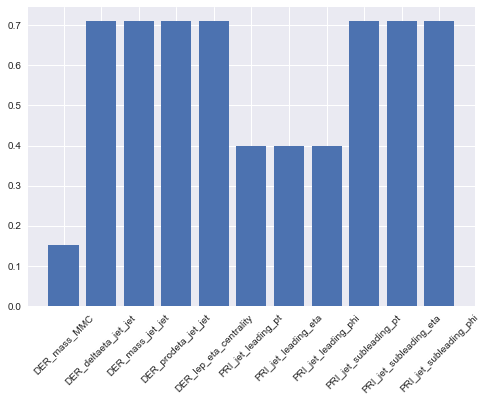

In [73]:
missing_mask = [(el>0)  for el in ratios]
plt.bar(np.array(features)[missing_mask],np.array(ratios)[missing_mask])
plt.xticks(rotation=45)
plt.title("")
plt.show()

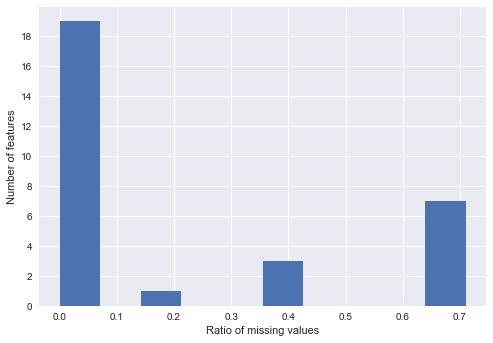

In [74]:
plt.hist(ratios)

plt.yticks(range(0,20,2))
plt.xlabel("Ratio of missing values")
plt.ylabel("Number of features")
plt.savefig("Missing_ratio.png")
plt.show()

In [ ]:
# Remove columns with too many missing values
X=np.delete(X,obj=to_remove,axis=1)
features=np.delete(features,obj=to_remove,axis=0)
X.shape

### Features Histogram

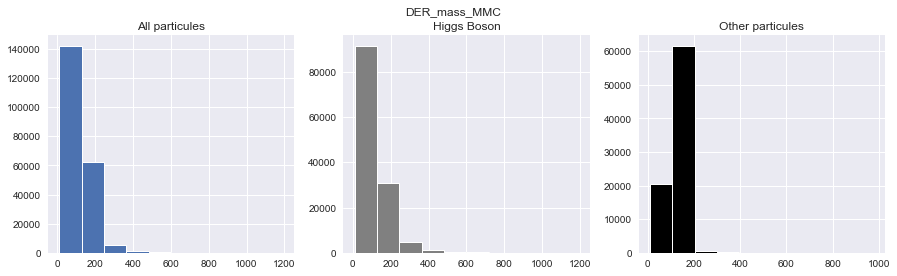

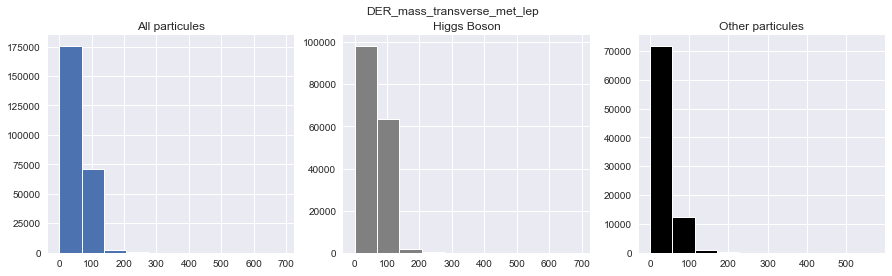

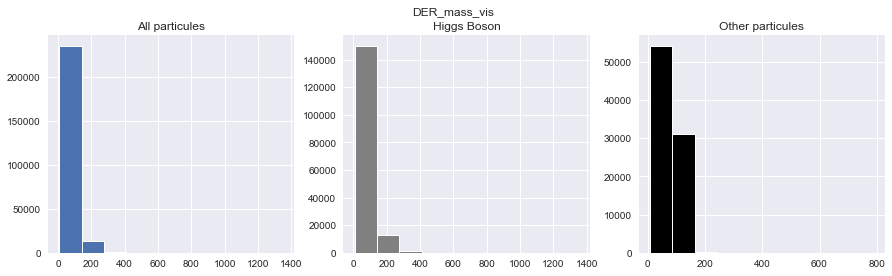

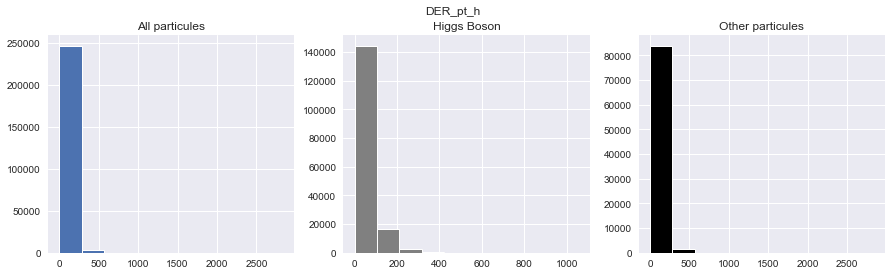

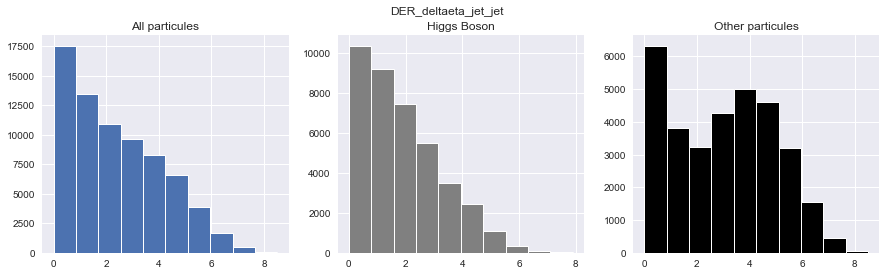

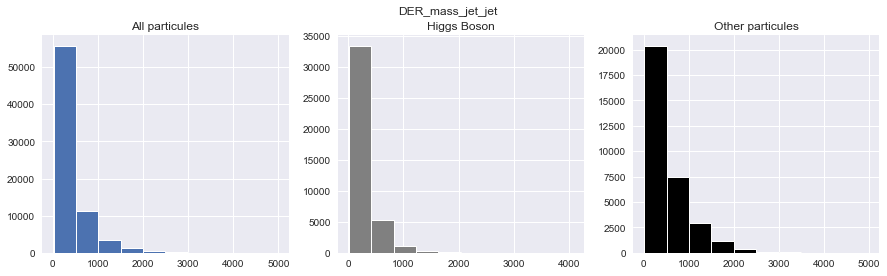

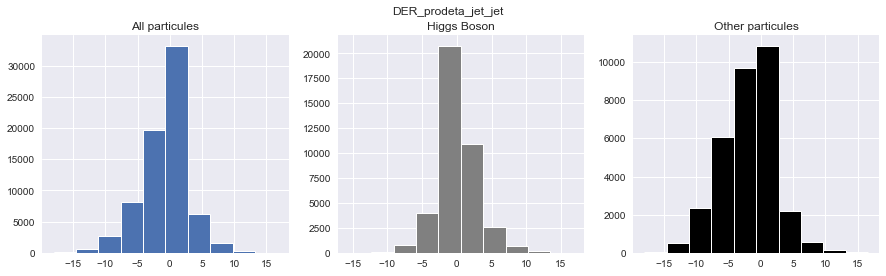

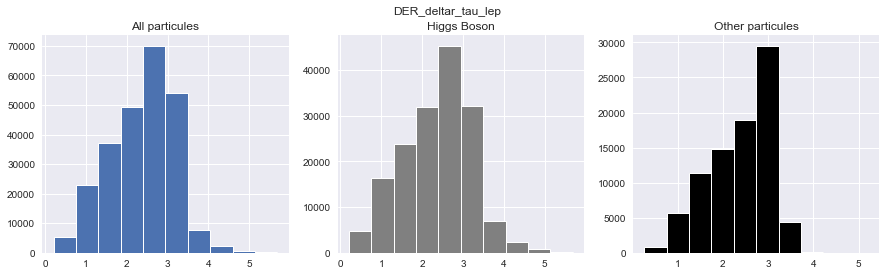

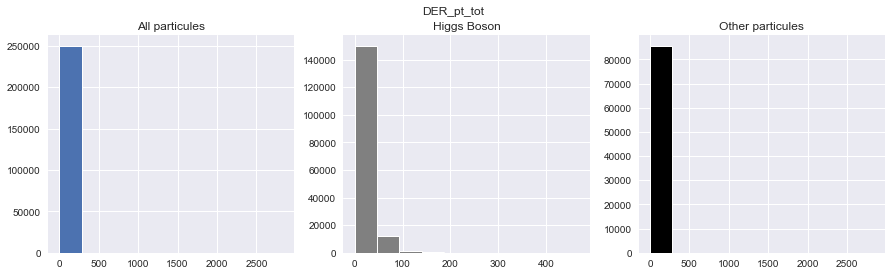

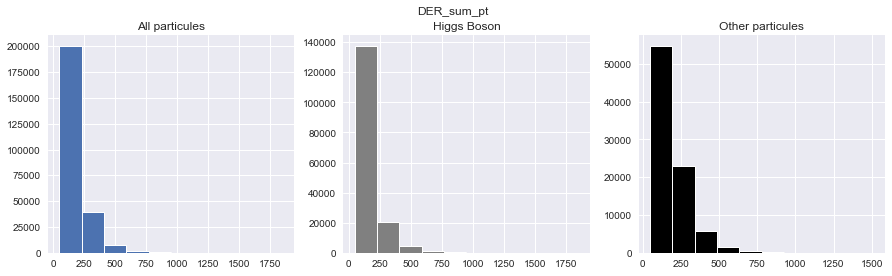

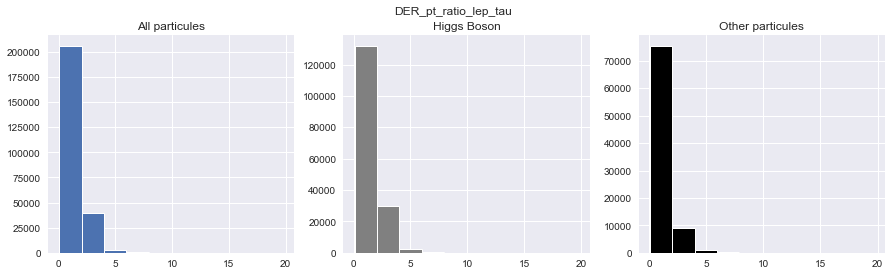

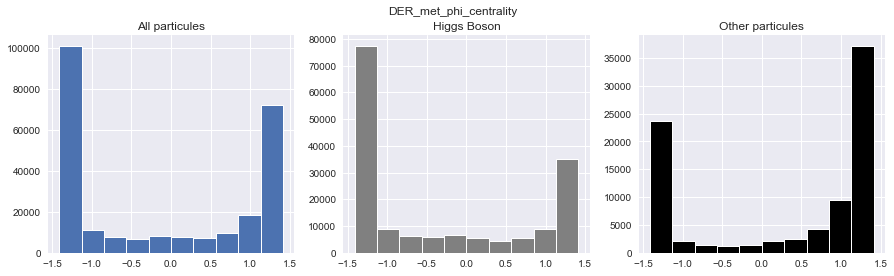

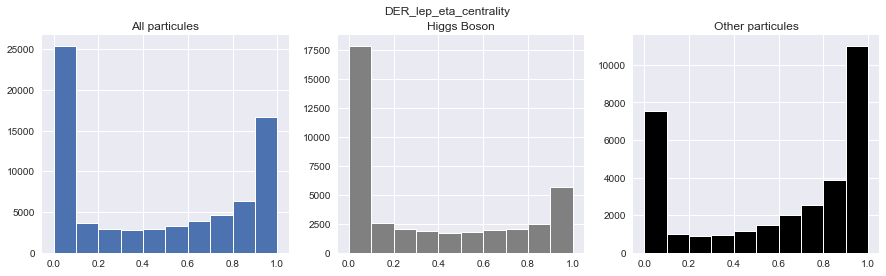

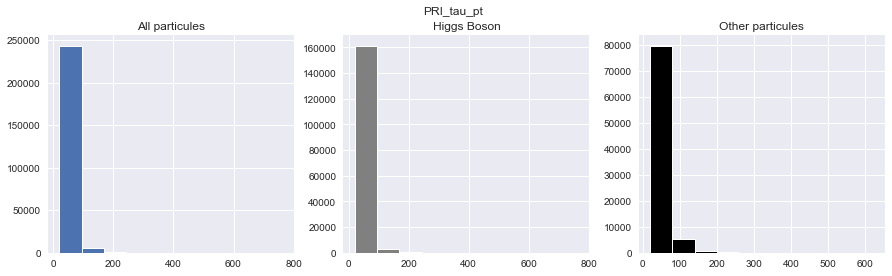

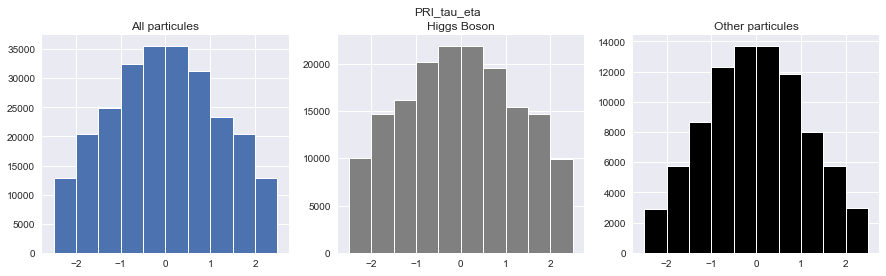

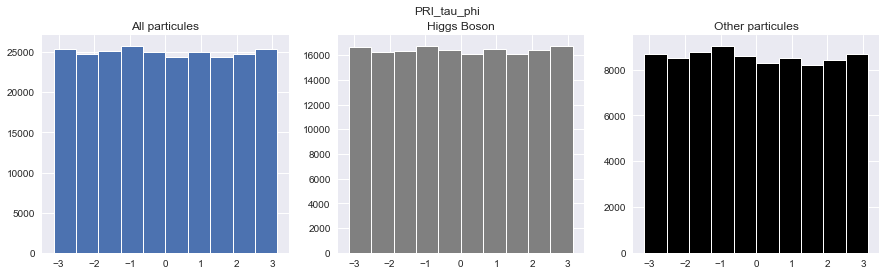

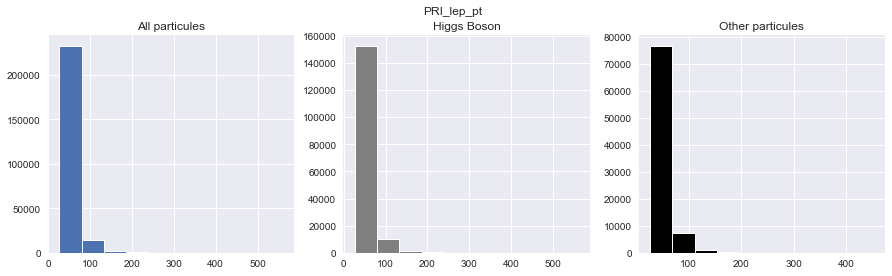

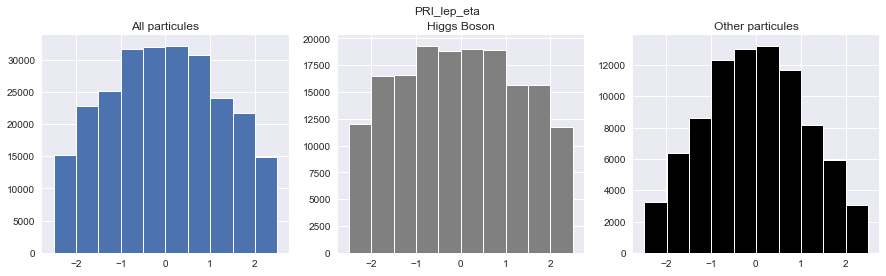

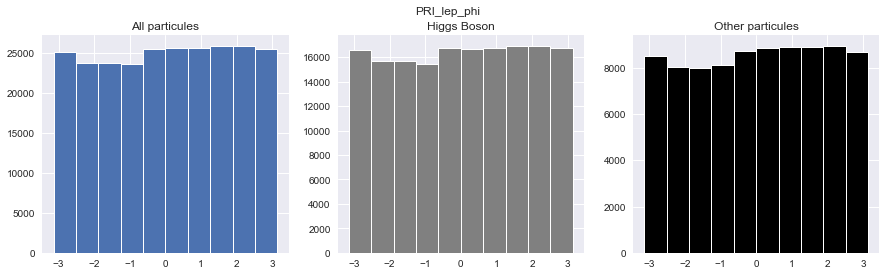

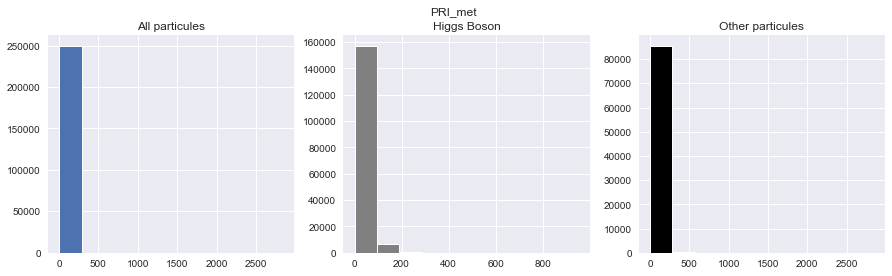

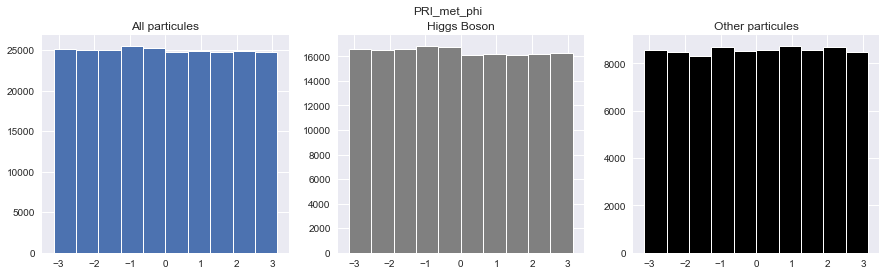

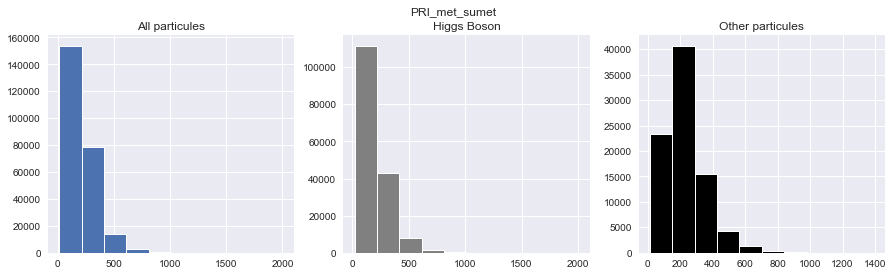

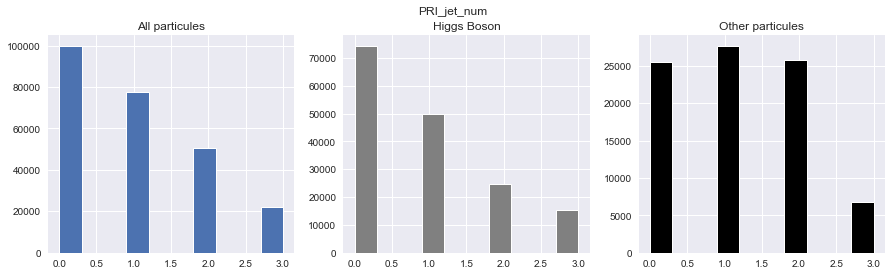

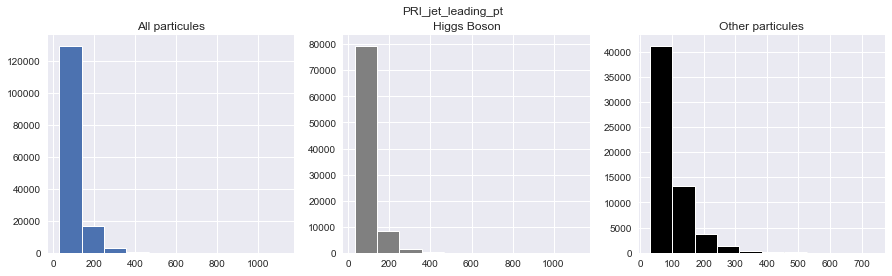

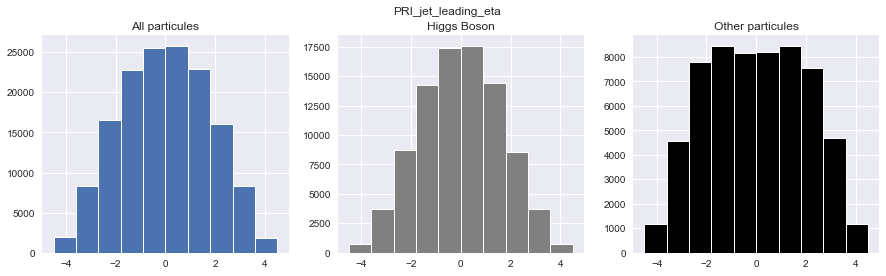

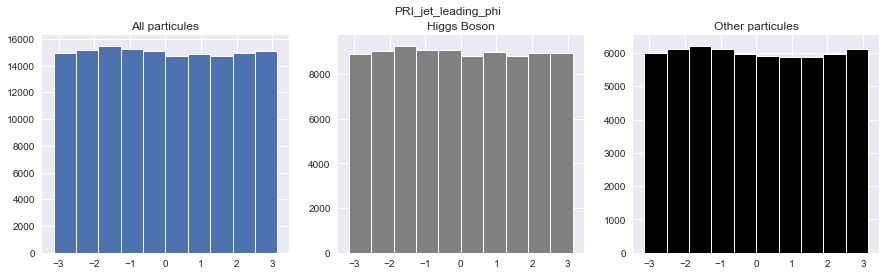

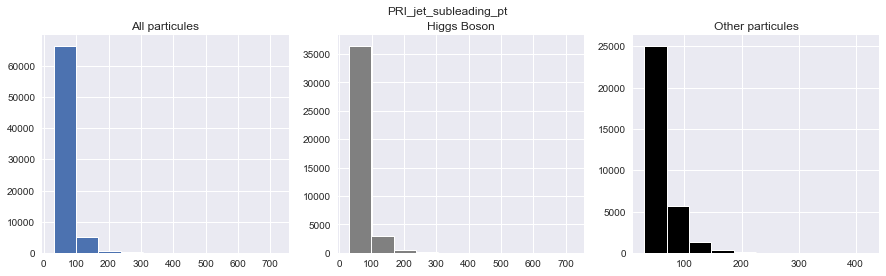

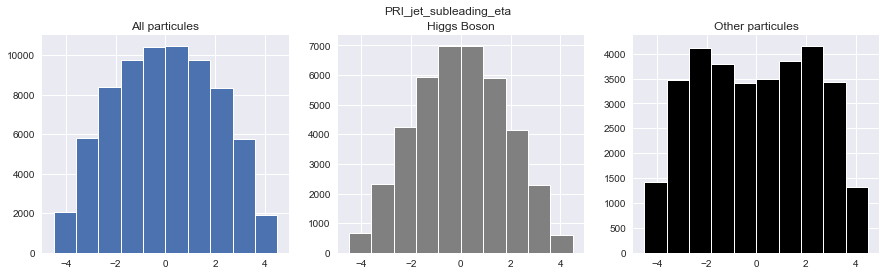

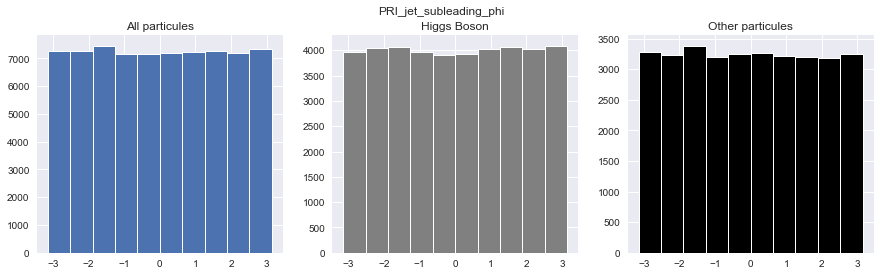

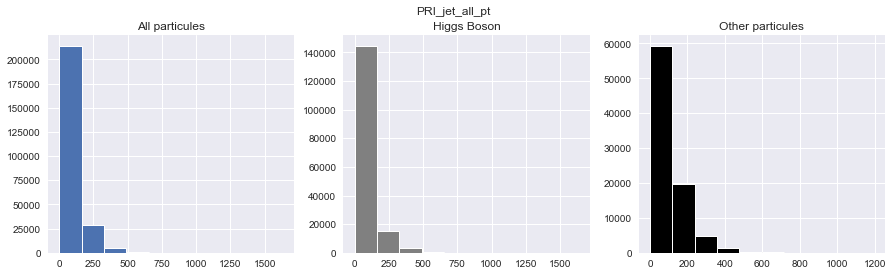

In [75]:
def feature_plot(feature, title,y, keep_missing_values=True):
    
    mask = np.full(len(y), keep_missing_values, dtype=bool) | (X[:,feature]>-990)
    fig, axs = plt.subplots(1, 3,figsize=(15,4))
    
    axs[0].set_title('All particules')
    axs[1].set_title('Higgs Boson')
    axs[2].set_title('Other particules')
    
    axs[0].hist(X[mask,feature],edgecolor='white', linewidth=1)
    axs[1].hist(X[np.logical_and(y==-1, mask),feature], color='grey',edgecolor='white', linewidth=1)
    axs[2].hist(X[np.logical_and(y==1, mask),feature], color='black',edgecolor='white', linewidth=1)

    plt.suptitle(title)
    plt.show()

for feature in range(X.shape[1]):
    feature_plot(feature,features[feature],y,False)

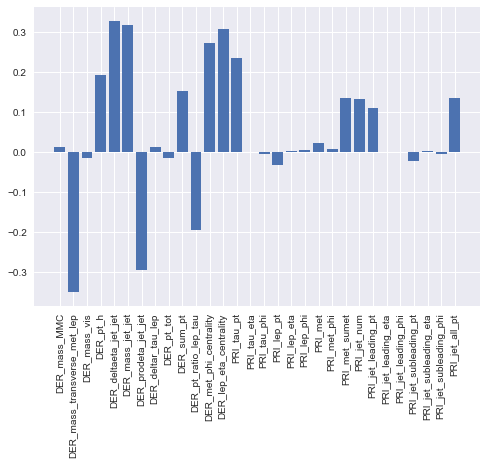

In [76]:
cors=[]

for feature in range(X.shape[1]):
    values=X[:,feature]
    missing_mask = values>-999
    cors.append(np.corrcoef(values[missing_mask],y[missing_mask])[1][0])
plt.bar(features,cors)
plt.xticks(rotation=90)
plt.show()

### Correlation Study

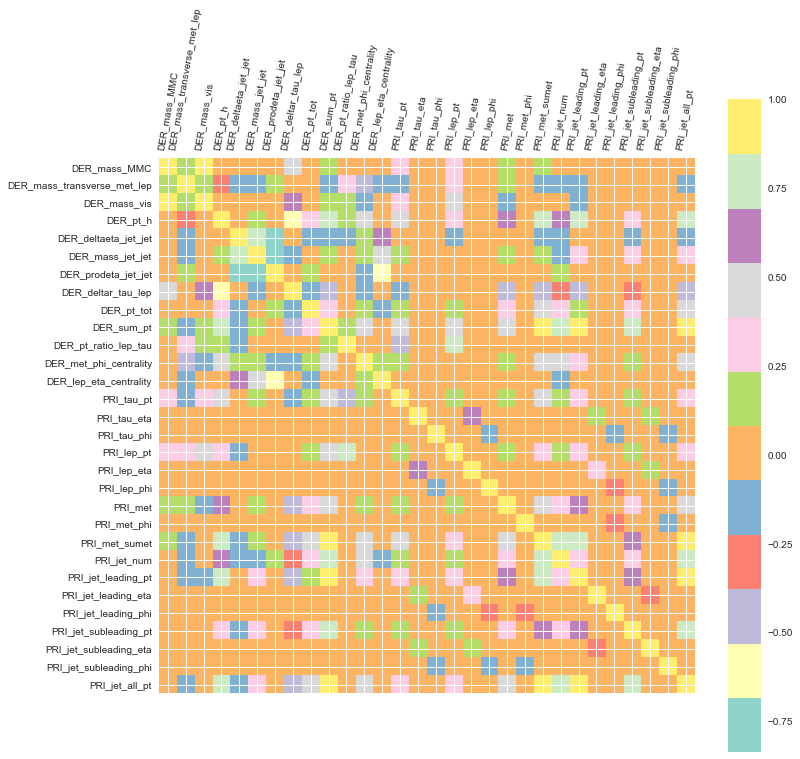

In [77]:
mutual_correlation = []

for feature1 in range(X.shape[1]):
    feature1_correlations = []
    for feature2 in range(X.shape[1]):
        feature1_values , feature2_values = X[:,feature1], X[:,feature2]
        mask = (feature1_values > -999) & (feature2_values > -999)
        correlation = np.corrcoef(feature1_values[mask],feature2_values[mask])[1][0]
        feature1_correlations.append(correlation)
    mutual_correlation.append(feature1_correlations)

plt.figure(figsize=(12,12))
plt.matshow(mutual_correlation,fignum=0,cmap='Set3')
plt.xticks(ticks=[x for x in range(X.shape[1])],labels=features,rotation=80)
plt.yticks(ticks=[x for x in range(X.shape[1])],labels=features)
plt.colorbar()
plt.savefig("features mutual correlation.png")
plt.show()

In [9]:
t=0.8
features_to_delete=[]
for feature1_index in range(np.shape(mutual_correlation)[1]):
    for feature2_index in range(np.shape(mutual_correlation)[0]):
            corr=mutual_correlation[feature1_index][feature2_index]
            if np.abs(corr)>t and feature1_index>feature2_index:
                features_to_delete.append(feature2_index)

features_to_delete=np.unique(features_to_delete)
features_to_delete

array([ 0,  3,  6, 17, 18, 19])

### Handle missing values 

In [7]:
for feature in range(X.shape[1]):
    mask = np.full(len(y), False, dtype=bool) | (X[:,feature]>-999)
    mean_boson = np.median(X[np.logical_and(y==-1, mask),feature])
    mean_other = np.median(X[np.logical_and(y==1, mask),feature])
    X[np.logical_and(y==-1, ~mask),feature] = mean_boson
    X[np.logical_and(y==1, ~mask),feature] = mean_other
    

### Interaction features

In [15]:
def interaction_feature_first_order(X):
    product_features = []

    for feature1 in range(X.shape[1]):
        for feature2 in range(X.shape[1]):
            if feature1 < feature2:
                new_feat = X[:,feature1] * X[:,feature2]
                product_features.append(new_feat)  
    return np.array(product_features).T

### Split Pri Jet

In [6]:
def split_data_jet_mask(x):
    """
    Returns 3 masks corresponding to the rows of x where the feature 22 'PRI_jet_num'
    is equal to 0, 1 and  2 or 3 respectively.
    """
    return x[:, 22] == 0, x[:, 22] == 1, x[:, 22] == 2, x[:, 22] == 3

In [47]:
mask_0, mask_1, mask_2, mask_3 = split_data_jet_mask(X)
X_0, y_0 = X[mask_0], y[mask_0]
X_1, y_1 = X[mask_1], y[mask_1]
X_2, y_2 = X[mask_2], y[mask_2]
X_3, y_3 = X[mask_3], y[mask_3]

In [48]:
def remove_null_features(X):
    to_remove = []
    for feature in range(len(X[0])):
        values = X[:,feature]
        missing_ratio = 1-np.sum(values>-999)/len(values)
        if (missing_ratio==1.0):
            to_remove.append(feature)
    X=np.delete(X,obj=to_remove,axis=1)
    return X   
    

In [49]:
X_0 = remove_null_features(X_0)
X_1 = remove_null_features(X_1)
X_2 = remove_null_features(X_2)
X_3 = remove_null_features(X_3)

In [10]:
def median_replacement(X,y):
    for feature in range(X.shape[1]):
        mask = np.full(len(y), False, dtype=bool) | (X[:,feature]>-999)
        median_boson = np.median(X[np.logical_and(y==-1, mask),feature])
        median_other = np.median(X[np.logical_and(y==1, mask),feature])
        X[np.logical_and(y==-1, ~mask),feature] = median_boson
        X[np.logical_and(y==1, ~mask),feature] = median_other
    return X

In [50]:
X_0 = median_replacement(X_0,y_0)
X_1 = median_replacement(X_1,y_1)
X_2 = median_replacement(X_2,y_2)
X_3 = median_replacement(X_3,y_3)

### optimization of hyper-parameters

In [34]:
lambdas = np.linspace(1e-9,0.1,6)
degrees = np.linspace(1,6,6, dtype="int")

In [37]:
degree, lambda_, acc = train_grid_search(y_0, X_0, ridge_regression, lambdas, degrees, 3, False)
print("degree:", degree, " lambda:", lambda_, " acc:", acc)

degree: 5.0  lambda: 1e-09  acc: 0.8372267595484025


In [52]:
X_0 = polynomial_expansion(X_0, 5)
lambda0 = 1e-9
weights0 = ridge_regression(y_0, X_0, lambda0)[0]
#y_pred = predict_labels(weights0, X_0)
#accuracy(y_pred, y_0)

0.8367679881496902

In [38]:
degree, lambda_, acc = train_grid_search(y_1, X_1, ridge_regression, lambdas, degrees, 3, False)
print("degree:", degree, " lambda:", lambda_, " acc:", acc)

degree: 6.0  lambda: 1e-09  acc: 0.7870628288455587


In [53]:
X_1 = polynomial_expansion(X_1, 6)
lambda1 = 1e-9
weights1 = ridge_regression(y_1, X_1, lambda1)[0]
#y_pred = predict_labels(weights1, X_1)
#accuracy(y_pred, y_1)

0.7879397503352935

In [39]:
degree, lambda_, acc = train_grid_search(y_2, X_2, ridge_regression, lambdas, degrees, 3, False)
print("degree:", degree, " lambda:", lambda_, " acc:", acc)

degree: 6.0  lambda: 0.0400000006  acc: 0.8142876992397626


In [54]:
X_2 = polynomial_expansion(X_2, 6)
lambda2 = 0.04
weights2 = ridge_regression(y_2, X_2, lambda2)[0]
#y_pred = predict_labels(weights2, X_2)
#accuracy(y_pred, y_2)

0.8171063339883682

In [40]:
degree, lambda_, acc = train_grid_search(y_3, X_3, ridge_regression, lambdas, degrees, 3, False)
print("degree:", degree, " lambda:", lambda_, " acc:", acc)

degree: 5.0  lambda: 0.0400000006  acc: 0.8051795704746435


In [55]:
X_3 = polynomial_expansion(X_3, 5)
lambda3 = 0.04
weights3 = ridge_regression(y_3, X_3, lambda3)[0]
#y_pred = predict_labels(weights3, X_3)
#accuracy(y_pred, y_3)

0.8088341454611081

## to do: create submission file

In [56]:
DATA_TEST_PATH = 'data/test.csv'
_, X_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = 'best_submission.csv' 
y_pred = predict_labels(weights, X_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [62]:
mask_0, mask_1, mask_2, mask_3 = split_data_jet_mask(X_test)
X_test_0, _0 = X_test[mask_0], _[mask_0]
X_test_1, _1 = X_test[mask_1], _[mask_1]
X_test_2, _2 = X_test[mask_2], _[mask_2]
X_test_3, _3 = X_test[mask_3], _[mask_3]


X_test_0 = remove_null_features(X_test_0)
X_test_1 = remove_null_features(X_test_1)
X_test_2 = remove_null_features(X_test_2)
X_test_3 = remove_null_features(X_test_3)

X_test_0 = median_replacement(X_test_0,_0)
X_test_1 = median_replacement(X_test_1,_1)
X_test_2 = median_replacement(X_test_2,_2)
X_test_3 = median_replacement(X_test_3,_3)

C:\Users\julie_000\Anaconda3\envs\ada\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\julie_000\Anaconda3\envs\ada\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [65]:
X_test_0 = polynomial_expansion(X_test_0, 5)
y_pred0 = predict_labels(weights0, X_test_0)
create_csv_submission(ids_test[mask_0], y_pred0, "submission0")

In [66]:
X_test_1 = polynomial_expansion(X_test_1, 6)
y_pred1 = predict_labels(weights1, X_test_1)
create_csv_submission(ids_test[mask_1], y_pred1, "submission1")

In [67]:
X_test_2 = polynomial_expansion(X_test_2, 6)
y_pred2 = predict_labels(weights2, X_test_2)
create_csv_submission(ids_test[mask_2], y_pred2, "submission2")

In [68]:
X_test_3 = polynomial_expansion(X_test_3, 5)
y_pred3 = predict_labels(weights3, X_test_3)
create_csv_submission(ids_test[mask_3], y_pred3, "submission3")

In [71]:
df0 = pd.read_csv("submission0")
df1 = pd.read_csv("submission1")
df2 = pd.read_csv("submission2")
df3 = pd.read_csv("submission3")

In [76]:
df = pd.concat([df0,df1,df2,df3])


,Id,Prediction
0,350000,-1
1,350002,-1
2,350003,1
3,350005,-1
4,350008,-1
...,...,...
50789,918189,-1
50790,918196,-1
50791,918203,-1
50792,918223,-1


In [77]:
df.to_csv("concatenated_file_submission.csv")